# Steel industry energy consumption forecasting

_by Virginia Herrero_

## Introduction

The steel industry is crucial to modern manufacturing but is also a major consumer of energy, leading to high operational costs and environmental impacts. As demand for steel rises, optimizing energy consumption becomes increasingly urgent.

This machine learning project focuses on analyzing energy consumption patterns within the steel industry, focusing on data from DAEWOO Steel Co. Ltd in Gwangyang, South Korea, which produces various coils, steel plates, and iron plates. By leveraging historical data and operational parameters, the project aims to identify key factors influencing energy use and develop predictive models to enhance energy efficiency. Ultimately, this initiative seeks to provide actionable insights that promote sustainability and reduce the carbon footprint of steel production.

## Project Overview

* Data loading
* Data cleaning
* Data exploration
* Pre-model data transformation
* Linear regression model

## Data loading
Load the CSV file **steel-industry-data** as a pandas DataFrame.

In [1]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv("steel-industry-data.csv")
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


## Data cleaning
Clean and pre-process the dataset prior to conducting further analysis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

* **Remove unnecessary columns**

The date column is not necessary for this analysis, as it is not a time series analysis. Therefore, it is removed from the dataset.

In [4]:
df = df.drop("date", axis = 1)

* **Rename columns**

Some column names have been renamed to enhance readability and improve comprehension of the dataset.

In [5]:
df.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [6]:
df = df.rename(columns = {"Usage_kWh" : "energy_usage_kWh",
                          "Lagging_Current_Reactive.Power_kVarh" : "lagging_current_kVarh",
                          "Leading_Current_Reactive_Power_kVarh" : "leading_current_kVarh",
                          "CO2(tCO2)" : "CO2_ppm",
                          "Lagging_Current_Power_Factor" : "lagging_current_power_factor",
                          "Leading_Current_Power_Factor" : "leading_current_power_factor",
                          "WeekStatus" : "week_status",
                          "Day_of_week" : "day_of_the_week",
                          "Load_Type" : "load_type"})

In [7]:
df.head()

,energy_usage_kWh,lagging_current_kVarh,leading_current_kVarh,CO2_ppm,lagging_current_power_factor,leading_current_power_factor,NSM,week_status,day_of_the_week,load_type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


* **Data types**

Check that all columns have the appropriate data types.

In [8]:
df.dtypes

energy_usage_kWh                float64
lagging_current_kVarh           float64
leading_current_kVarh           float64
CO2_ppm                         float64
lagging_current_power_factor    float64
leading_current_power_factor    float64
NSM                               int64
week_status                      object
day_of_the_week                  object
load_type                        object
dtype: object

* **Null values**

Identify and remove any missing values, zero values, or NaN values from the dataset as needed.

In [9]:
# Check the total of null values in each column
df.isna().sum()

energy_usage_kWh                0
lagging_current_kVarh           0
leading_current_kVarh           0
CO2_ppm                         0
lagging_current_power_factor    0
leading_current_power_factor    0
NSM                             0
week_status                     0
day_of_the_week                 0
load_type                       0
dtype: int64

There are no missing values in the dataset.

* **Duplicated values**

Verify if there are any duplicate entries in the dataset.

In [10]:
df.duplicated().sum()

np.int64(81)

In [11]:
# Show all duplicated values
df[df.duplicated()]

,energy_usage_kWh,lagging_current_kVarh,leading_current_kVarh,CO2_ppm,lagging_current_power_factor,leading_current_power_factor,NSM,week_status,day_of_the_week,load_type
1053,4.64,4.79,0.00,0.0,69.58,100.00,84600,Weekday,Thursday,Light_Load
1560,4.64,4.61,0.00,0.0,70.94,100.00,22500,Weekday,Wednesday,Light_Load
3189,5.94,4.97,0.00,0.0,76.69,100.00,19800,Weekend,Saturday,Light_Load
6157,4.64,5.83,0.00,0.0,62.27,100.00,12600,Weekday,Tuesday,Light_Load
8150,4.21,0.00,25.81,0.0,100.00,16.10,78300,Weekday,Monday,Medium_Load
...,...,...,...,...,...,...,...,...,...,...
31690,4.72,4.28,0.00,0.0,74.08,100.00,9900,Weekday,Tuesday,Light_Load
32236,3.67,0.00,16.34,0.0,100.00,21.91,69300,Weekend,Sunday,Light_Load
33142,4.00,3.64,0.00,0.0,73.96,100.00,20700,Weekday,Wednesday,Light_Load
34192,3.42,2.92,0.00,0.0,76.05,100.00,15300,Weekend,Sunday,Light_Load


In [12]:
# Drop all duplicated values
df = df.drop_duplicates()

Eighty-one duplicate entries were detected and removed from the dataset.

* **Outliers**

Check for outliers in the dataset by first examining its statistical summary. This will provide an initial overview of the data.

In [13]:
df.describe()

,energy_usage_kWh,lagging_current_kVarh,leading_current_kVarh,CO2_ppm,lagging_current_power_factor,leading_current_power_factor,NSM
count,34959.000000,34959.000000,34959.000000,34959.000000,34959.000000,34959.000000,34959.000000
mean,27.443111,13.056014,3.875959,0.011551,80.625036,84.350093,42781.343860
std,33.462669,16.319073,7.427964,0.016160,18.902835,30.467553,24923.195433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.420000,99.690000,21600.000000
50%,4.570000,5.000000,0.000000,0.000000,88.000000,100.000000,43200.000000
75%,51.300000,22.720000,2.090000,0.020000,99.040000,100.000000,64800.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


At first glance, it can be inferred that there are some outliers in the columns **energy_usage_kWh**, **lagging_current_kVarh**, and **leading_current_kVarh**. This conclusion is based on the observation that the maximum values exceed both the mean and the median, which can indicate the presence of outliers.

A more thorough evaluation of these outliers is necessary to identify them and assess the appropriate approach for handling them.

Outliers in these three columns or features will be identified using the Interquartile Range (IQR) method. Analyzing the distribution of the data will reveal values that fall outside the typical range, enabling the selection of an appropriate approach for handling these outliers.

**1. Outliers in the feature "energy_usage_kWh":**

Text(0.5, 0.98, 'Energy Usage Distribution')

<Figure size 640x480 with 0 Axes>

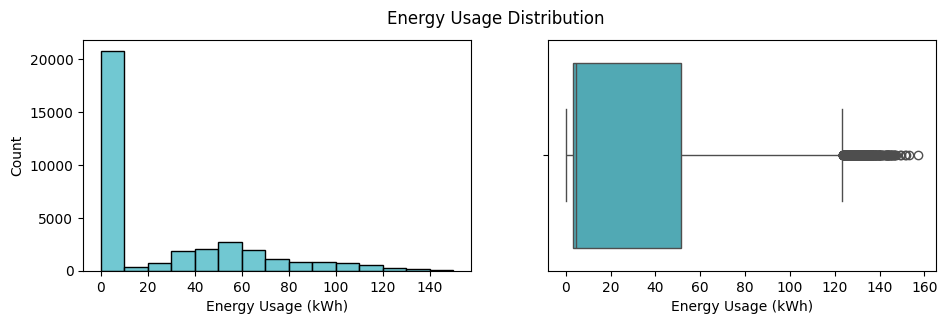

In [14]:
# Plot the energy usage distribution using a histogram and boxplot
energy_usage_distribution = plt.figure()
fig, ax = plt.subplots(1, 2, figsize = (11, 3))
sns.histplot(df["energy_usage_kWh"], ax = ax[0], bins = 15, binrange = (0, 150), color = "#41b6c4")
sns.boxplot(x = df["energy_usage_kWh"], ax = ax[1], color = "#41b6c4")
ax[0].set_xlabel("Energy Usage (kWh)")
ax[1].set_xlabel("Energy Usage (kWh)")
plt.suptitle("Energy Usage Distribution", size = 12)

A significant number of outliers have been identified through the boxplot of the feature "energy_usage_kWh." These outliers will be now quantified statistically.

In [15]:
# Create a function to find outliers using the IQR method

def find_outliers_iqr(dataframe, column):
    """
    Finds outliers in the specified column of a DataFrame using the IQR method

    Parameters
    ----------
    dataframe : Pandas DataFrame
        The DataFrame containing the data
    
    column : str
        The name of the column (as a string) in which to find the outliers

    Returns
    -------
    Pandas DataFrame
        A DataFrame containing the outliers identified in the specified column
   """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    print(f"The number of outliers in the column {column} is {outliers.shape[0]}")
    
    return outliers

In [16]:
outliers_energy_usage = find_outliers_iqr(df, "energy_usage_kWh")
outliers_energy_usage

The number of outliers in the column energy_usage_kWh is 322


,energy_usage_kWh,lagging_current_kVarh,leading_current_kVarh,CO2_ppm,lagging_current_power_factor,leading_current_power_factor,NSM,week_status,day_of_the_week,load_type
140,128.52,70.85,0.0,0.00,87.57,100.0,40500,Weekday,Tuesday,Maximum_Load
141,144.47,78.48,0.0,0.00,87.87,100.0,41400,Weekday,Tuesday,Maximum_Load
150,124.45,49.79,0.0,0.00,92.85,100.0,49500,Weekday,Tuesday,Medium_Load
153,129.10,53.50,0.0,0.00,92.38,100.0,52200,Weekday,Tuesday,Medium_Load
155,143.89,60.91,0.0,0.00,92.09,100.0,54000,Weekday,Tuesday,Medium_Load
...,...,...,...,...,...,...,...,...,...,...
33851,145.22,70.67,0.0,0.07,89.92,100.0,54000,Weekday,Wednesday,Medium_Load
33853,130.46,60.23,0.0,0.06,90.79,100.0,55800,Weekday,Wednesday,Medium_Load
33855,125.21,58.43,0.0,0.06,90.62,100.0,57600,Weekday,Wednesday,Medium_Load
33856,133.56,64.40,0.0,0.06,90.08,100.0,58500,Weekday,Wednesday,Medium_Load


The number of outliers is relatively low, so while they could simply be removed, I’ve decided to cap them instead. This approach allows me to retain the overall structure of the dataset while minimizing the impact of extreme values. 

In [17]:
def cap_outliers(dataframe, column):
    """
    Cap outliers in a specified column of the DataFrame using the IQR method

    Parameters
    ----------
    dataframe : Pandas DataFrame
        The DataFrame containing the data
    
    column : str
        The name of the column to cap outliers


    Returns
    -------
    Pandas DataFrame
        A DataFrame with outliers capped
    """
    if column not in dataframe.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    
    # Calculate Q1 and Q3
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)

    # Calculate IQR

    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    dataframe[column] = dataframe[column].clip(lower = lower_bound, upper = upper_bound)

    return dataframe

In [18]:
df = cap_outliers(df, "energy_usage_kWh")

**2. Outliers in the feature "lagging_current_kVarh":**

Text(0.5, 0.98, 'Lagging Current Distribution')

<Figure size 640x480 with 0 Axes>

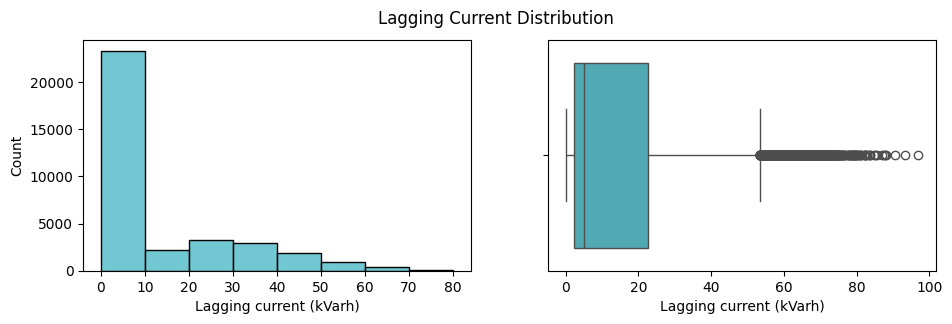

In [19]:
# Plot the lagging current distribution using a histogram and boxplot
lagging_current_distribution = plt.figure()
fig, ax = plt.subplots(1, 2, figsize = (11, 3))
sns.histplot(df["lagging_current_kVarh"], ax = ax[0], bins = 8, binrange = (0, 80), color = "#41b6c4")
sns.boxplot(x = df["lagging_current_kVarh"], ax = ax[1], color = "#41b6c4")
ax[0].set_xlabel("Lagging current (kVarh)")
ax[1].set_xlabel("Lagging current (kVarh)")
plt.suptitle("Lagging Current Distribution", size = 12)

In [20]:
outliers_lagging_current = find_outliers_iqr(df, "lagging_current_kVarh")
outliers_lagging_current

The number of outliers in the column lagging_current_kVarh is 1039


,energy_usage_kWh,lagging_current_kVarh,leading_current_kVarh,CO2_ppm,lagging_current_power_factor,leading_current_power_factor,NSM,week_status,day_of_the_week,load_type
140,123.45,70.85,0.0,0.00,87.57,100.0,40500,Weekday,Tuesday,Maximum_Load
141,123.45,78.48,0.0,0.00,87.87,100.0,41400,Weekday,Tuesday,Maximum_Load
142,90.86,54.29,0.0,0.00,85.84,100.0,42300,Weekday,Tuesday,Maximum_Load
143,123.30,66.06,0.0,0.00,88.15,100.0,43200,Weekday,Tuesday,Maximum_Load
152,123.12,55.26,0.0,0.00,91.23,100.0,51300,Weekday,Tuesday,Medium_Load
...,...,...,...,...,...,...,...,...,...,...
33853,123.45,60.23,0.0,0.06,90.79,100.0,55800,Weekday,Wednesday,Medium_Load
33855,123.45,58.43,0.0,0.06,90.62,100.0,57600,Weekday,Wednesday,Medium_Load
33856,123.45,64.40,0.0,0.06,90.08,100.0,58500,Weekday,Wednesday,Medium_Load
33921,79.85,60.98,0.0,0.04,79.48,100.0,30600,Weekday,Thursday,Light_Load


The feature "lagging_current_kVarh" has more outliers than the energy usage feature. These outliers will be addressed in a consistent manner, with capping applied at the upper limit determined by the IQR method.

In [21]:
df = cap_outliers(df, "lagging_current_kVarh")

**3. Outliers in the feature "leading_current_kVarh":**

Text(0.5, 0.98, 'Leading Current Distribution')

<Figure size 640x480 with 0 Axes>

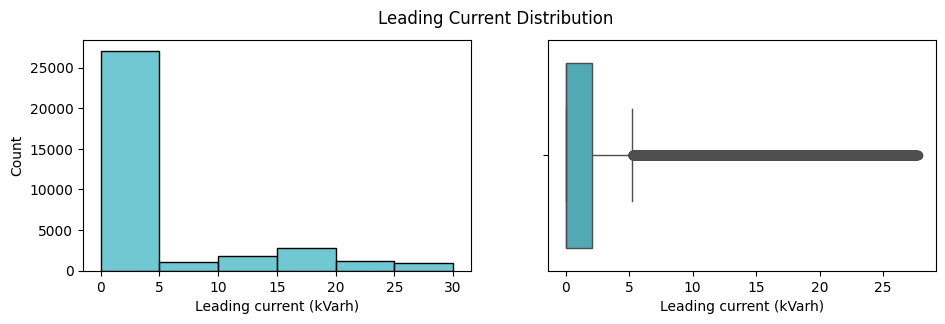

In [22]:
# Plot the lagging current distribution using a histogram and boxplot
leading_current_distribution = plt.figure()
fig, ax = plt.subplots(1, 2, figsize = (11, 3))
sns.histplot(df["leading_current_kVarh"], ax = ax[0], bins = 6, binrange = (0, 30), color = "#41b6c4")
sns.boxplot(x = df["leading_current_kVarh"], ax = ax[1], color = "#41b6c4")
ax[0].set_xlabel("Leading current (kVarh)")
ax[1].set_xlabel("Leading current (kVarh)")
plt.suptitle("Leading Current Distribution", size = 12)

In [23]:
outliers_leading_current = find_outliers_iqr(df, "leading_current_kVarh")
outliers_leading_current

The number of outliers in the column leading_current_kVarh is 7751


,energy_usage_kWh,lagging_current_kVarh,leading_current_kVarh,CO2_ppm,lagging_current_power_factor,leading_current_power_factor,NSM,week_status,day_of_the_week,load_type
35,3.89,0.0,15.66,0.0,100.0,24.11,32400,Weekday,Monday,Light_Load
36,3.60,0.0,16.96,0.0,100.0,20.76,33300,Weekday,Monday,Light_Load
37,4.03,0.0,21.28,0.0,100.0,18.61,34200,Weekday,Monday,Light_Load
38,3.92,0.0,19.22,0.0,100.0,19.98,35100,Weekday,Monday,Light_Load
39,3.64,0.0,16.88,0.0,100.0,21.08,36000,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...
35027,3.42,0.0,13.36,0.0,100.0,24.80,75600,Weekday,Monday,Light_Load
35028,3.42,0.0,13.39,0.0,100.0,24.75,76500,Weekday,Monday,Light_Load
35029,3.49,0.0,13.36,0.0,100.0,25.27,77400,Weekday,Monday,Light_Load
35030,3.42,0.0,13.36,0.0,100.0,24.80,78300,Weekday,Monday,Light_Load


The number of outliers in the feature "leading_current_kVahr" is significantly greater than in the other features. Nevertheless, the approach to handling these outliers will remain consistent.

In [24]:
df = cap_outliers(df, "leading_current_kVarh")

**The clean dataset:**

In [25]:
energy_consumption = df.copy()
energy_consumption.head()

,energy_usage_kWh,lagging_current_kVarh,leading_current_kVarh,CO2_ppm,lagging_current_power_factor,leading_current_power_factor,NSM,week_status,day_of_the_week,load_type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


## Data exploration

In this section, an in-depth data exploratory analysis is carried out.

* **Univariate exploration**

Let's have a quick glance to the whole dataset feature by feature to have a general overview of the dataset.

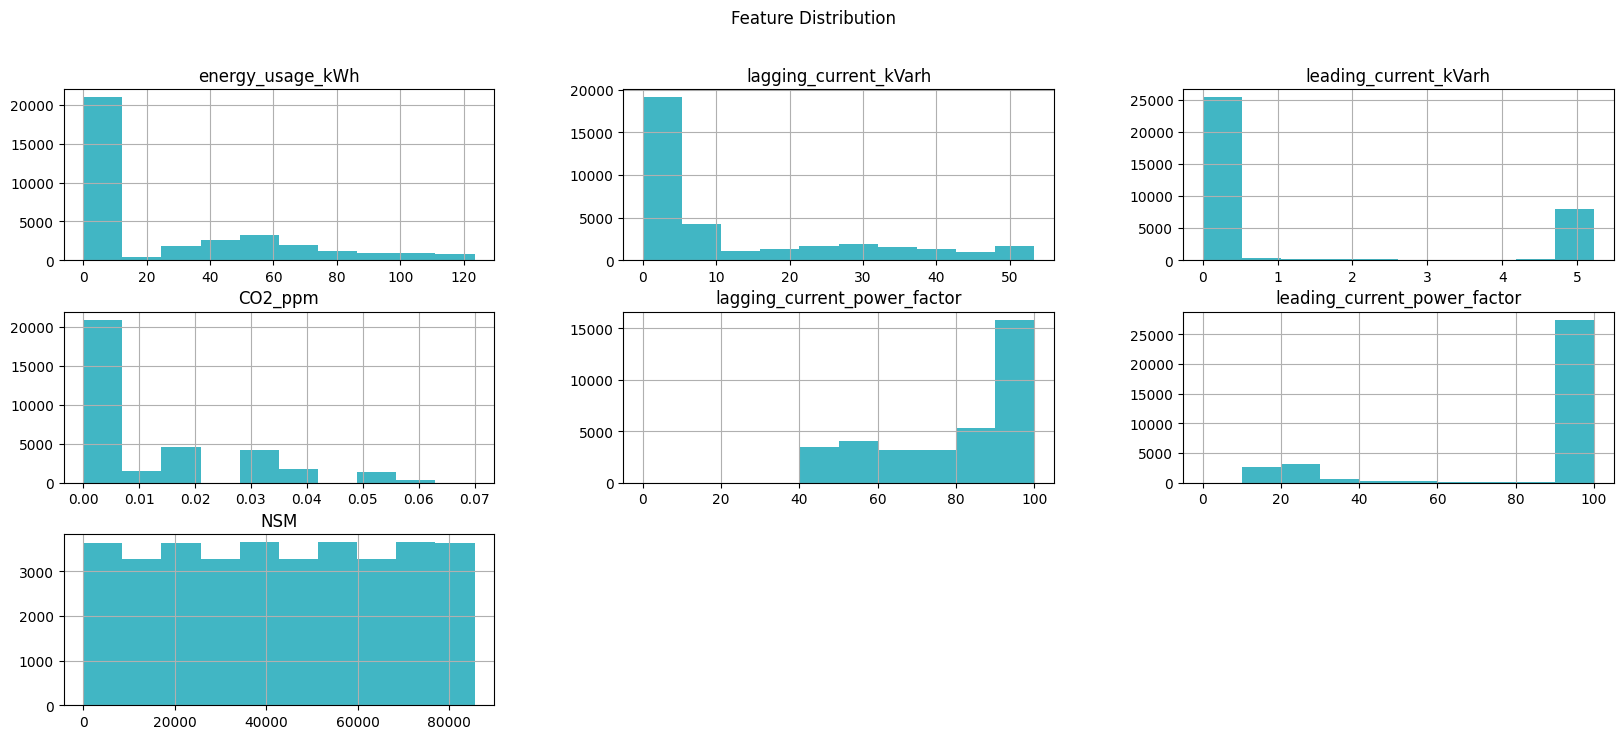

In [26]:
# Plot all features distribution
energy_consumption.hist(figsize = (20, 8), color = "#41b6c4")
plt.suptitle("Feature Distribution")
plt.show()

* **Correlation matrix**

A correlation matrix is used to find the correlation between features.

In [27]:
correlations = energy_consumption.corr(numeric_only = True)
correlations

,energy_usage_kWh,lagging_current_kVarh,leading_current_kVarh,CO2_ppm,lagging_current_power_factor,leading_current_power_factor,NSM
energy_usage_kWh,1.000000,0.899713,-0.327652,0.988312,0.386671,0.355814,0.235347
lagging_current_kVarh,0.899713,1.000000,-0.456593,0.891220,0.147397,0.419149,0.086991
leading_current_kVarh,-0.327652,-0.456593,1.000000,-0.330451,0.590916,-0.910476,0.394468
CO2_ppm,0.988312,0.891220,-0.330451,1.000000,0.378864,0.360935,0.231394
lagging_current_power_factor,0.386671,0.147397,0.590916,0.378864,1.000000,-0.519594,0.565436
leading_current_power_factor,0.355814,0.419149,-0.910476,0.360935,-0.519594,1.000000,-0.360365
NSM,0.235347,0.086991,0.394468,0.231394,0.565436,-0.360365,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

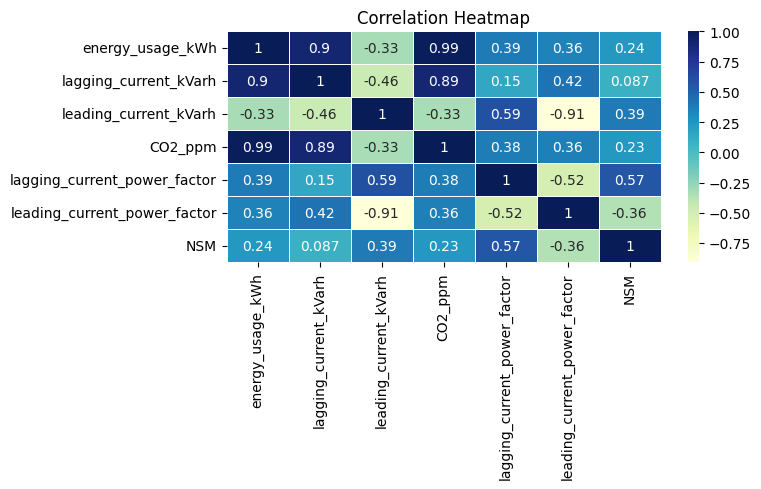

In [28]:
correlation_heatmap_graph = plt.figure(figsize = (7, 3))
sns.heatmap(correlations, linewidths = 0.5, annot = True, cmap = "YlGnBu")
plt.title("Correlation Heatmap", size = 12)

Here’s a brief explanation of the insights obtained from the correlation matrix:

### Strong Positive Correlations:
* **Energy Usage and Lagging Current**:
   - As energy usage increases, lagging current also tends to increase. This suggests that higher energy consumption is associated with more inductive loads, which typically exhibit lagging current.

* **Energy Usage and CO2**:
   - Higher energy usage correlates with increased CO2 emissions. This relationship likely reflects the reliance on fossil fuels for energy, which emit CO2 when consumed.

* **Lagging Current and CO2**:
   - A strong correlation indicates that as lagging current increases, CO2 emissions also increase. This may suggest that systems with higher inductive loads (and thus higher lagging currents) are contributing more to CO2 emissions.

### Moderate Positive Correlation:
* **Energy Usage and Lagging and Leading Current Power**:
   - This indicates that as energy usage increases, both lagging and leading current power also increase. It suggests that both types of power contribute to overall energy consumption, reflecting different load characteristics.

### Strong Negative Correlation:
* **Leading Current and Leading Current Power Factor**:
   - A strong negative correlation means that as leading current increases, the leading current power factor decreases. This implies that higher leading current is associated with less efficient power usage, potentially due to reactive power becoming more prominent.

### Moderate Negative Correlations:
* **Energy Usage and Leading Current**:
   - As energy usage increases, leading current tends to decrease. This might indicate that systems with higher energy consumption rely less on capacitive loads.

* **Lagging Current and Leading Current**:
   - This negative correlation suggests that as lagging current increases, leading current decreases, reflecting the competing nature of inductive and capacitive loads in a system.

* **Leading Current and CO2**:
   - Higher leading current is associated with lower CO2 emissions. This might indicate that systems using more capacitive loads (which can produce leading currents) are emitting less CO2, possibly due to greater efficiency or reliance on cleaner energy sources.

After identifying the correlations between the features of the dataset, the next step is to determine the type of correlation: linear or non-linear. To achieve this, the findings from the correlation heatmap will be visualized using scatter plots.

<Figure size 640x480 with 0 Axes>

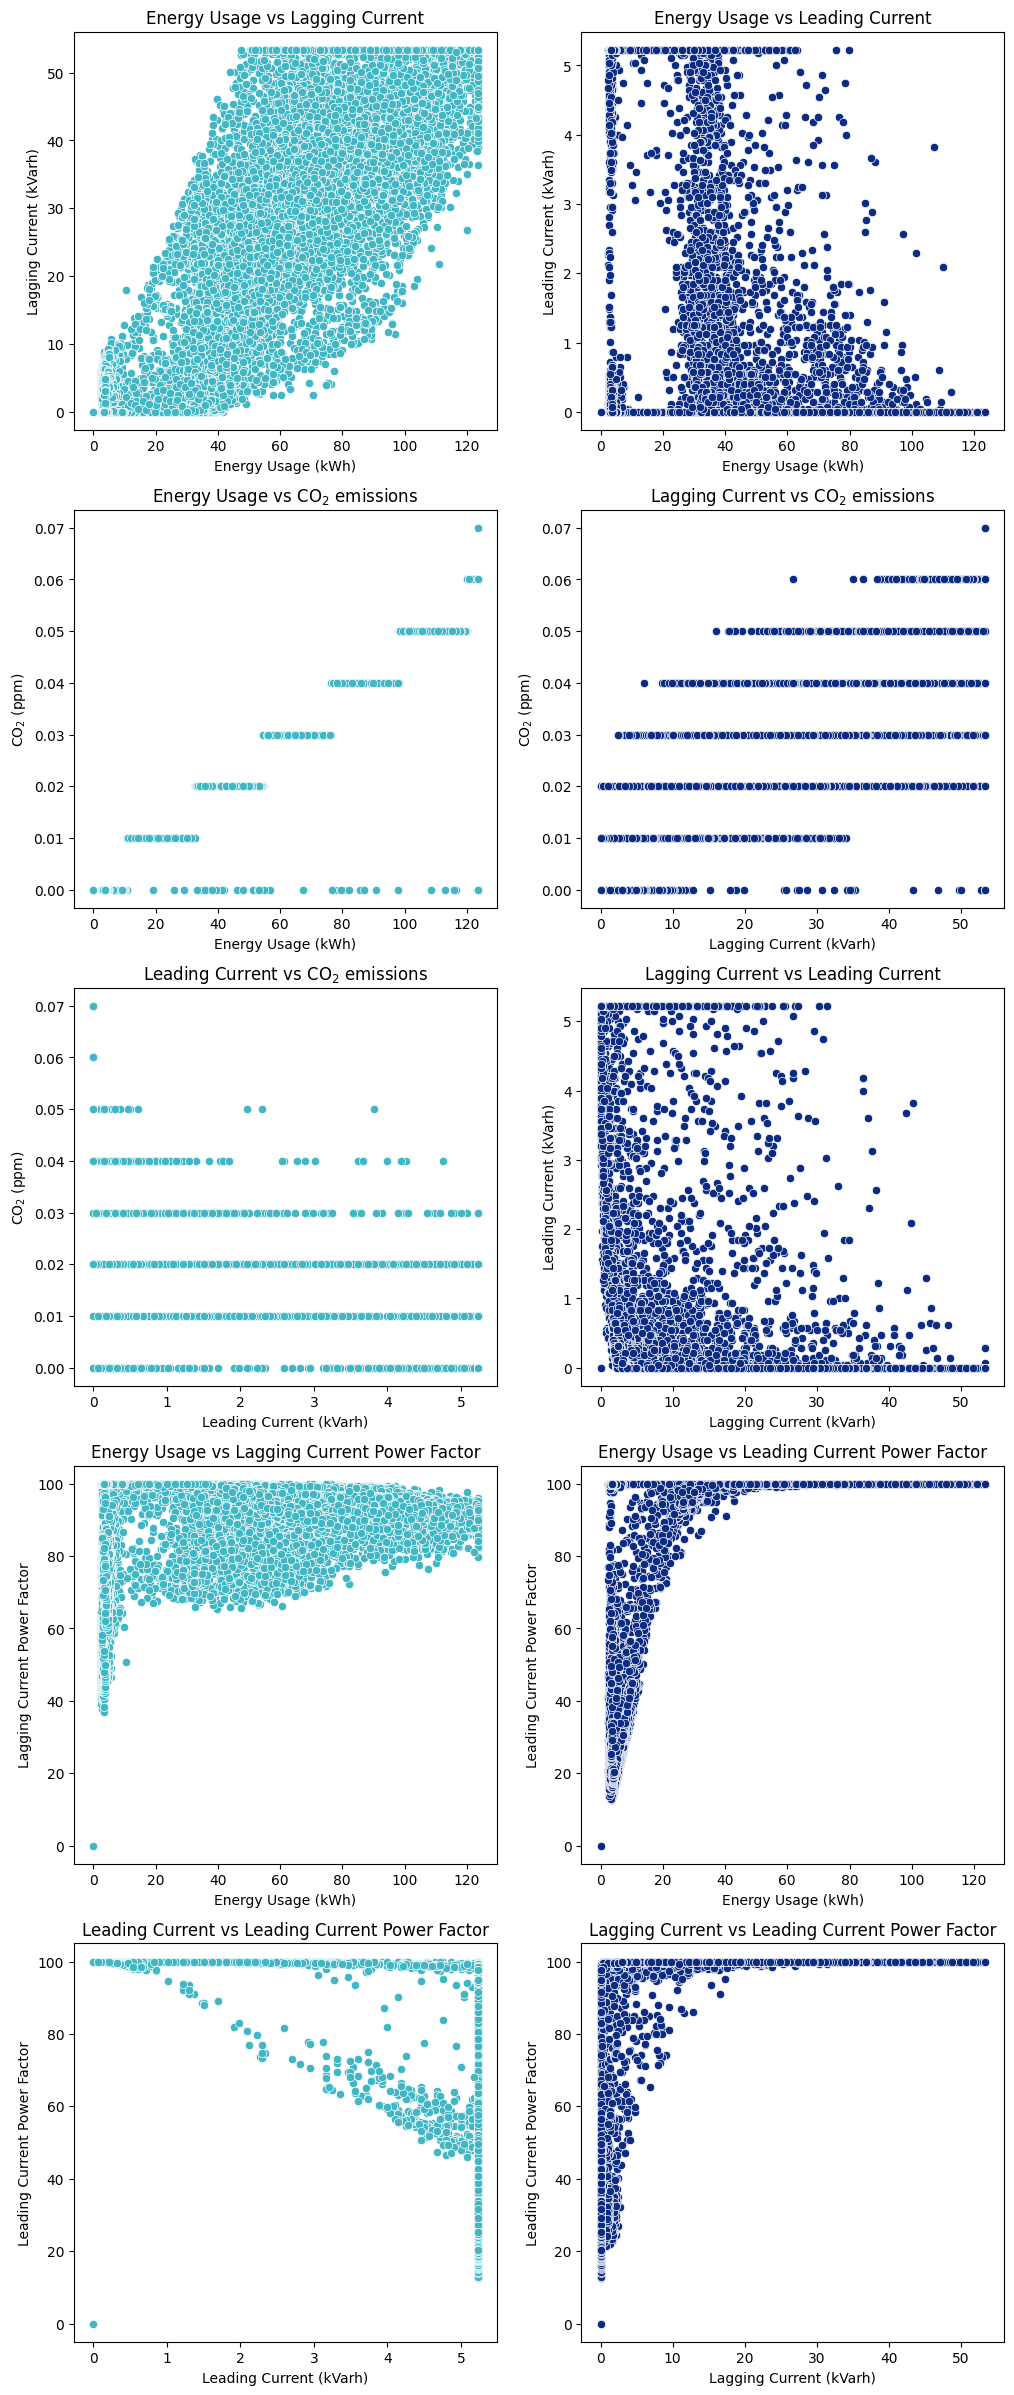

In [29]:
# Plot scatterplots
correlation_scatterplot_graph = plt.figure()

fig, ax = plt.subplots(5, 2, figsize=(12, 30))

ax = ax.flatten()

sns.scatterplot(data = energy_consumption, x = "energy_usage_kWh", y = "lagging_current_kVarh", ax = ax[0], color = "#41b6c4")
ax[0].set_title("Energy Usage vs Lagging Current")
ax[0].set_xlabel("Energy Usage (kWh)")
ax[0].set_ylabel("Lagging Current (kVarh)")

sns.scatterplot(data = energy_consumption, x = "energy_usage_kWh", y = "leading_current_kVarh", ax = ax[1], color = "#0c2c84")
ax[1].set_title("Energy Usage vs Leading Current")
ax[1].set_xlabel("Energy Usage (kWh)")
ax[1].set_ylabel("Leading Current (kVarh)")

sns.scatterplot(data = energy_consumption, x = "energy_usage_kWh", y = "CO2_ppm", ax = ax[2], color = "#41b6c4")
ax[2].set_title("Energy Usage vs CO$_2$ emissions")
ax[2].set_xlabel("Energy Usage (kWh)")
ax[2].set_ylabel("CO$_2$ (ppm)")

sns.scatterplot(data = energy_consumption, x = "lagging_current_kVarh", y = "CO2_ppm", ax = ax[3], color = "#0c2c84") 
ax[3].set_title("Lagging Current vs CO$_2$ emissions")
ax[3].set_xlabel("Lagging Current (kVarh)")
ax[3].set_ylabel("CO$_2$ (ppm)")

sns.scatterplot(data = energy_consumption, x = "leading_current_kVarh", y = "CO2_ppm", ax = ax[4], color = "#41b6c4") 
ax[4].set_title("Leading Current vs CO$_2$ emissions")
ax[4].set_xlabel("Leading Current (kVarh)")
ax[4].set_ylabel("CO$_2$ (ppm)")

sns.scatterplot(data = energy_consumption, x = "lagging_current_kVarh", y = "leading_current_kVarh", ax = ax[5], color = "#0c2c84") 
ax[5].set_title("Lagging Current vs Leading Current")
ax[5].set_xlabel("Lagging Current (kVarh)")
ax[5].set_ylabel("Leading Current (kVarh)")

sns.scatterplot(data = energy_consumption, x = "energy_usage_kWh", y = "lagging_current_power_factor", ax = ax[6], color = "#41b6c4") 
ax[6].set_title("Energy Usage vs Lagging Current Power Factor")
ax[6].set_xlabel("Energy Usage (kWh)")
ax[6].set_ylabel("Lagging Current Power Factor")

sns.scatterplot(data = energy_consumption, x = "energy_usage_kWh", y = "leading_current_power_factor", ax = ax[7], color = "#0c2c84") 
ax[7].set_title("Energy Usage vs Leading Current Power Factor")
ax[7].set_xlabel("Energy Usage (kWh)")
ax[7].set_ylabel("Leading Current Power Factor")

sns.scatterplot(data = energy_consumption, x = "leading_current_kVarh", y = "leading_current_power_factor", ax = ax[8], color = "#41b6c4") 
ax[8].set_title("Leading Current vs Leading Current Power Factor")
ax[8].set_xlabel("Leading Current (kVarh)")
ax[8].set_ylabel("Leading Current Power Factor")

sns.scatterplot(data = energy_consumption, x = "lagging_current_kVarh", y = "leading_current_power_factor", ax = ax[9], color = "#0c2c84") 
ax[9].set_title("Lagging Current vs Leading Current Power Factor")
ax[9].set_xlabel("Lagging Current (kVarh)")
ax[9].set_ylabel("Leading Current Power Factor")

plt.show()

The scatter plots indicate that all the correlations are linear.

* **Energy consumption during the week**

The days with the highest energy consumption are Tuesdays and Thursdays, while Sundays show the lowest consumption.

Text(0.5, 1.0, 'Energy Consumption During the Week')

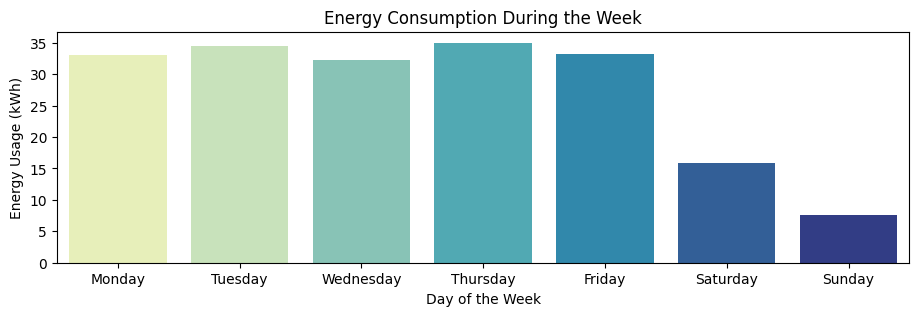

In [30]:
consumption_during_the_week_graph = plt.figure(figsize = (11, 3))
sns.barplot(energy_consumption, x = "day_of_the_week", y = "energy_usage_kWh", errorbar= None, hue = "day_of_the_week", palette = "YlGnBu")
plt.xlabel("Day of the Week")
plt.ylabel("Energy Usage (kWh)")
plt.title("Energy Consumption During the Week", size = 12)

Energy consumption varies between weekdays and weekends, with higher usage typically observed on weekdays and lower consumption on weekends.

Text(0.5, 1.0, 'Energy Consumption During the Week')

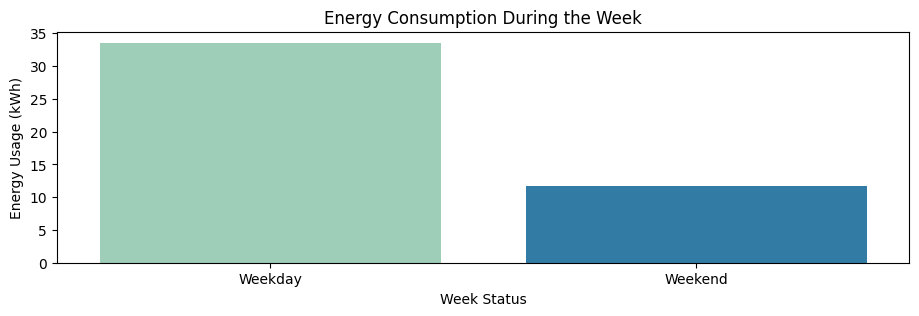

In [31]:
consumption_by_weekstatus_graph = plt.figure(figsize = (11, 3))
sns.barplot(energy_consumption, x = "week_status", y = "energy_usage_kWh", errorbar= None, hue = "week_status", palette = "YlGnBu")
plt.xlabel("Week Status")
plt.ylabel("Energy Usage (kWh)")
plt.title("Energy Consumption During the Week", size = 12)

* **Energy consumption by load type**

Energy consumption is higher during maximum load conditions and lower when the load type is light.

Text(0.5, 1.0, 'Energy Consumption by Load Type')

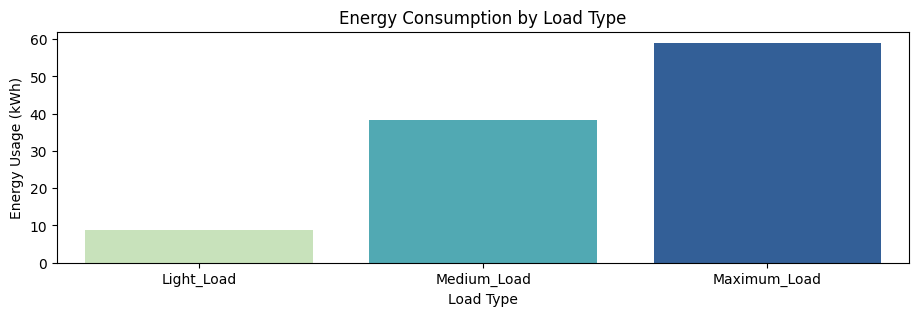

In [32]:
consumption_by_load_type_graph = plt.figure(figsize = (11, 3))
sns.barplot(energy_consumption, x = "load_type", y = "energy_usage_kWh", errorbar= None, hue = "load_type", palette = "YlGnBu")
plt.xlabel("Load Type")
plt.ylabel("Energy Usage (kWh)")
plt.title("Energy Consumption by Load Type", size = 12)

* **Energy consumption by load during the week**

The distribution of energy consumption based on load type remains consistent throughout the week.

Text(0.5, 1.0, 'Energy Consumption by Load Type During the Week')

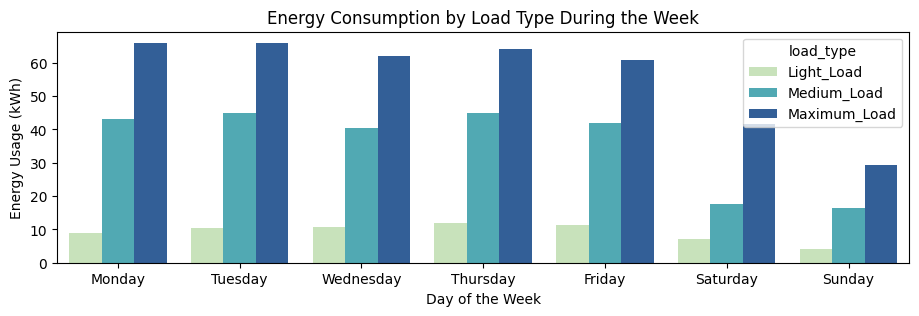

In [33]:
consumption_by_load_type_during_the_week_graph = plt.figure(figsize = (11, 3))
sns.barplot(energy_consumption, x = "day_of_the_week", y = "energy_usage_kWh", errorbar= None, hue = "load_type", palette = "YlGnBu")
plt.xlabel("Day of the Week")
plt.ylabel("Energy Usage (kWh)")
plt.title("Energy Consumption by Load Type During the Week", size = 12)

Text(0.5, 1.0, 'Energy Consumption by Load Type and Week Status')

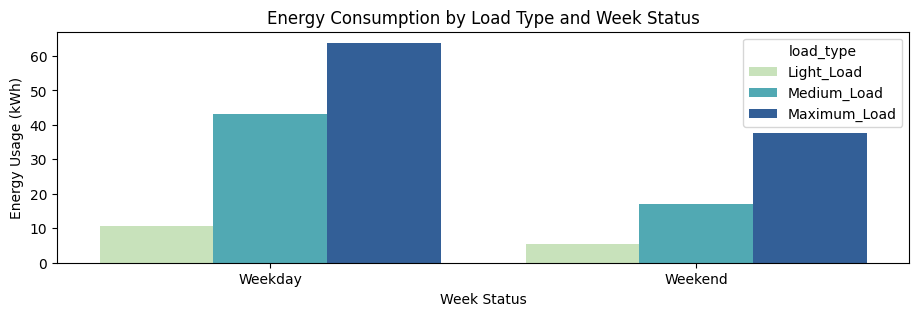

In [34]:
consumption_by_load_type_by_weekstatus_graph = plt.figure(figsize = (11, 3))
sns.barplot(energy_consumption, x = "week_status", y = "energy_usage_kWh", errorbar= None, hue = "load_type", palette = "YlGnBu")
plt.xlabel("Week Status")
plt.ylabel("Energy Usage (kWh)")
plt.title("Energy Consumption by Load Type and Week Status", size = 12)

* **Load type distribution**

In [35]:
load_type_distribution = energy_consumption["load_type"].value_counts()
load_type_distribution

load_type
Light_Load      17994
Medium_Load      9693
Maximum_Load     7272
Name: count, dtype: int64

Text(0.5, 1.0, 'Load Type Distribution')

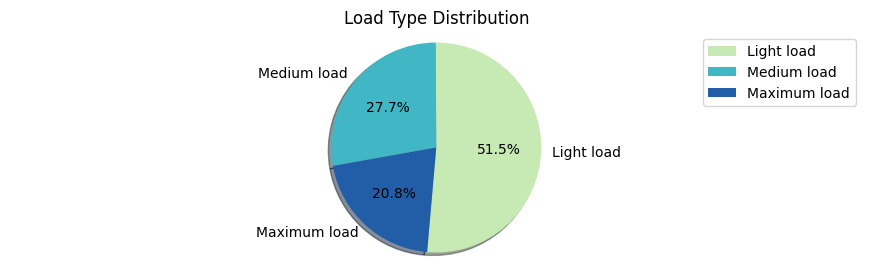

In [36]:
labels = ["Light load", "Medium load", "Maximum load"]
colors = ["#c7e9b4", "#41b6c4", "#225ea8"]

load_type_distribution_graph = plt.figure(figsize = (11, 3))
plt.pie(load_type_distribution, labels = labels, colors = colors, startangle = 265, autopct="%1.1f%%", shadow = True)
plt.axis("equal")
plt.legend()
plt.title("Load Type Distribution")

* **CO<sub>2</sub> emissions distribution during the week**

CO<sub>2</sub> emissions are higher on weekdays, particularly on Tuesdays and Thursdays. This trend is expected, as CO<sub>2</sub> emissions are closely linked to energy consumption.

Text(0.5, 1.0, 'CO$_2$ Emissions During the Week')

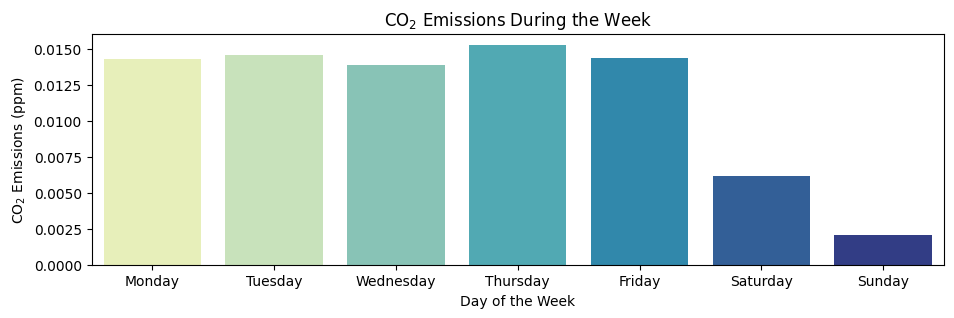

In [37]:
co2_emissions_during_the_week_graph = plt.figure(figsize = (11, 3))
sns.barplot(energy_consumption, x = "day_of_the_week", y = "CO2_ppm", errorbar= None, hue = "day_of_the_week", palette = "YlGnBu")
plt.xlabel("Day of the Week")
plt.ylabel("CO$_2$ Emissions (ppm)")
plt.title("CO$_2$ Emissions During the Week", size = 12)

* **CO<sub>2</sub> emission by load type**

 CO<sub>2</sub> emissions are higher during peak load times and lower during lighter load periods.

Text(0.5, 1.0, 'CO$_2$ Emissions by Load Type')

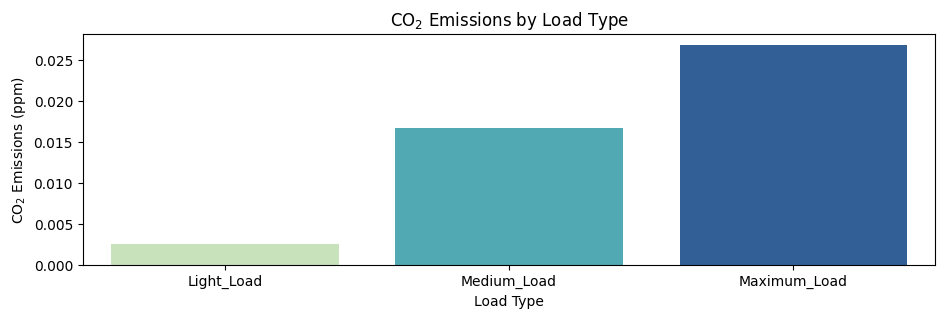

In [38]:
co2_emissions_by_load_type_graph = plt.figure(figsize = (11, 3))
sns.barplot(energy_consumption, x = "load_type", y = "CO2_ppm", errorbar= None, hue = "load_type", palette = "YlGnBu")
plt.xlabel("Load Type")
plt.ylabel("CO$_2$ Emissions (ppm)")
plt.title("CO$_2$ Emissions by Load Type", size = 12)

## Pre-model data transformation

* **Encoding categorical data**

Most machine learning models require numerical input, which means categorical variables must be converted into numerical values for better comprehension by the model. In the case of linear regression, dummy encoding is the preferred method for encoding categorical data, as it helps prevent multicollinearity issues in the model.

In [39]:
energy_consumption = pd.get_dummies(energy_consumption, drop_first = True)
energy_consumption.head()

,energy_usage_kWh,lagging_current_kVarh,leading_current_kVarh,CO2_ppm,lagging_current_power_factor,leading_current_power_factor,NSM,week_status_Weekend,day_of_the_week_Monday,day_of_the_week_Saturday,day_of_the_week_Sunday,day_of_the_week_Thursday,day_of_the_week_Tuesday,day_of_the_week_Wednesday,load_type_Maximum_Load,load_type_Medium_Load
0,3.17,2.95,0.0,0.0,73.21,100.0,900,False,True,False,False,False,False,False,False,False
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,False,True,False,False,False,False,False,False,False
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,False,True,False,False,False,False,False,False,False
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,False,True,False,False,False,False,False,False,False
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,False,True,False,False,False,False,False,False,False


* **Split data**

The dataset is divided into two main parts: the training set (70%) and the testing set (30%). This is done to avoid overfitting by training on one set and testing in another, and to perform the evaluation of the model. 

**_Training set_**: this is the portion of the dataset used to train the model. During training, the model learns patterns, relationships, and features from the data.

**_Testing set_**: this set is used to evaluate the model's performance after training. It helps assess how well the model generalizes to unseen data.

In [40]:
# Independent features
X = energy_consumption.drop("energy_usage_kWh", axis = 1)

# Dependent or target feature
y = energy_consumption["energy_usage_kWh"]

# Split the dataset into training and testing sets
# Import required function form the module
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print("Training set - X_train shape:", X_train.shape)
print("Testing set - X_test shape:", X_test.shape)
print("Training set - y_train shape:", y_train.shape)
print("Testing set - y_test shape:", y_test.shape)

Training set - X_train shape: (24471, 15)
Testing set - X_test shape: (10488, 15)
Training set - y_train shape: (24471,)
Testing set - y_test shape: (10488,)


## Linear Regression Model

This is a regression problem due to the continuous (numerical) nature of the target variable and the linear relationship between the features and the target variable. Therefore, a linear regression model is the most suitable choice. The LinearRegression module from scikit-learn will be used to build this model.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create the linear regression model
linear_regression_model = LinearRegression()
# Train the model with the training set
linear_regression_model.fit(X_train, y_train)
# Make predictions using the model on test set
y_pred = linear_regression_model.predict(X_test)

The evaluation of the model will be conducted using the following metrics: coefficient of determination (R²), mean squared error (MSE), root mean squared error (RMSE), and mean absolute error (MAE).

In [42]:
# Evaluate the model
r2_score = linear_regression_model.score(X_test, y_test) # coefficient of determination or r-squared
mse = mean_squared_error(y_test, y_pred) # mean squared error
rmse = np.sqrt(mse) #root mean squared error
mae = mean_absolute_error(y_test, y_pred) # mean absolute error

In [43]:
# Print the results
print("Evaluation metrics of the regression model:\n")
print(f"R² Score: {r2_score:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")

Evaluation metrics of the regression model:

R² Score: 0.984
Mean Squared Error: 17.960
Root Mean Squared Error: 4.238
Mean Absolute Error: 2.605


After evaluation, the model is visualized by plotting the actual values against the predicted values.

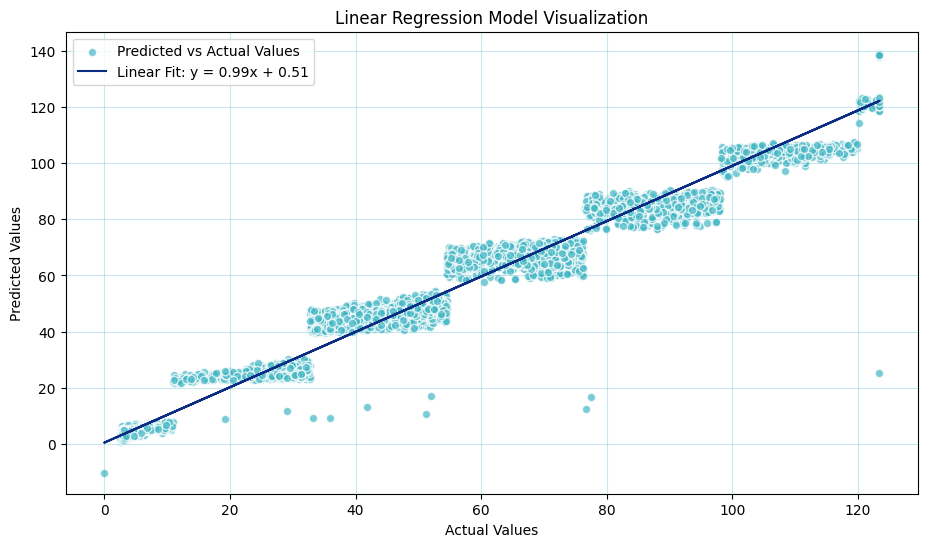

In [ ]:
# Assigning actual and predicted values
x = y_test 
y = y_pred

# Calculate the parameters of the linear regression
m, b = np.polyfit(x, y, 1)

plt.figure(figsize = (11, 6))

# Scatter plot of actual vs. predicted values
plt.scatter(x, y, color = "#41b6c4", label = "Predicted vs Actual Values", alpha = 0.7, edgecolors = "white")

# Plot the linear regression line
plt.plot(x, m * x + b, color = "#0c2c84", label = f"Linear Fit: y = {m:.2f}x + {b:.2f}")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Model Visualization")
plt.grid(alpha = 0.3)
plt.legend()